<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:  http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

%matplotlib inline

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [2]:
transfusion = pd.read_csv('dat/transfusion.data')

In [3]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
transfusion.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


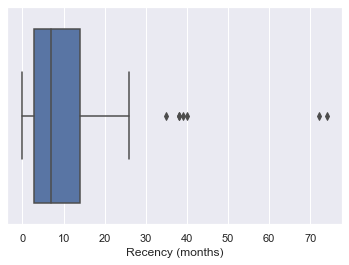

In [7]:
sns.boxplot(transfusion['Recency (months)']);

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


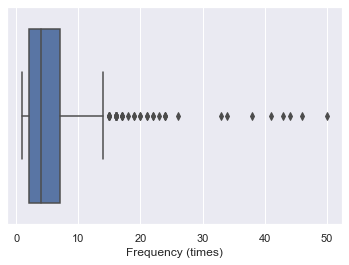

In [8]:
sns.boxplot(transfusion['Frequency (times)']);

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


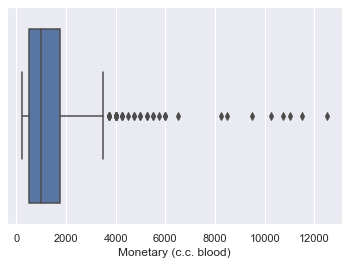

In [9]:
sns.boxplot(transfusion['Monetary (c.c. blood)']);

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


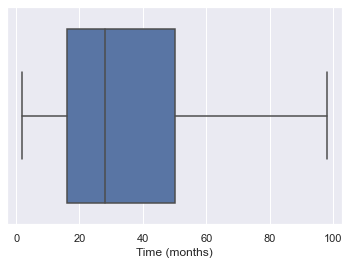

In [10]:
sns.boxplot(transfusion['Time (months)']);

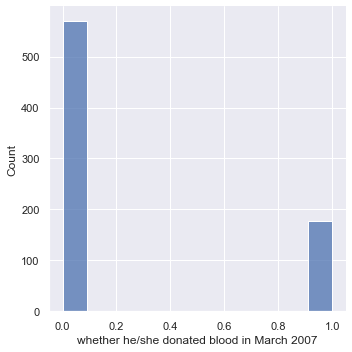

In [11]:
sns.displot(transfusion['whether he/she donated blood in March 2007']);

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [12]:
transfusion.duplicated().sum()

215

In [13]:
transfusion.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [14]:
transfusion.drop_duplicates(keep='first', inplace=True)

In [15]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            533 non-null    int64
 1   Frequency (times)                           533 non-null    int64
 2   Monetary (c.c. blood)                       533 non-null    int64
 3   Time (months)                               533 non-null    int64
 4   whether he/she donated blood in March 2007  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


In [16]:
transfusion.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),533.0,9.529081,8.250860,0.0,3.0,8.0,14.0,74.0
Frequency (times),533.0,6.990619,6.265875,1.0,3.0,5.0,9.0,50.0
Monetary (c.c. blood),533.0,1747.654784,1566.468760,250.0,750.0,1250.0,2250.0,12500.0
Time (months),533.0,42.303940,23.295291,2.0,26.0,38.0,58.0,98.0
whether he/she donated blood in March 2007,533.0,0.279550,0.449200,0.0,0.0,0.0,1.0,1.0


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [17]:
# Target column
y = transfusion['whether he/she donated blood in March 2007']

In [18]:
y.value_counts()

0    384
1    149
Name: whether he/she donated blood in March 2007, dtype: int64

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='whether he/she donated blood in March 2007', ylabel='count'>

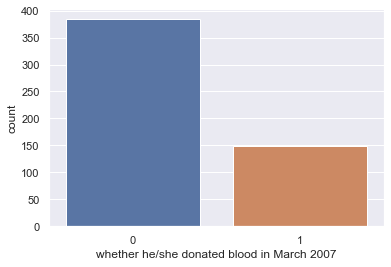

In [19]:
sns.countplot(y)

In [20]:
# Predictor column
predictor_columns = [c for c in transfusion.columns if c != 'whether he/she donated blood in March 2007']
X = transfusion[predictor_columns]

In [21]:
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [23]:
# STEP 1: split X and y into training and testing sets (using random_state=1 for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [24]:
# STEP 2: train the model on the training set 
#dtc = DecisionTreeClassifier(class_weight='balanced', random_state=1) #Accuracy score:  0.5607476635514018
#dtc = DecisionTreeClassifier(random_state=1) # Accuracy score:  0.6261682242990654
dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Step 9: Fit the Model

In [25]:
#fit the model
dtc_1.fit(X_train,y_train)

# STEP 3: test the model on the testing set, and check the accuracy
test_score = dtc_1.score(X_test,y_test)
print('Accuracy score for testing set: ', test_score)

Accuracy score for testing set:  0.7663551401869159


# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [26]:
"""dtc_params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 3],
    'min_weight_fraction_leaf': [0.1, 0.2, 0.3],
    'max_features': ["auto", "sqrt", "log2", 1, 0.1],
    'random_state': [1],
    'max_leaf_nodes': [],
    'min_impurity_decrease': [5000],
    'min_impurity_split': [0.0, 0.5, 1.0],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0, 0.5, 1]    
}"""

dtc_params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 3],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'max_features': [None, "auto", "sqrt", "log2", 1, 2, 0.1],
    'random_state': [7, 8, 9, 42, 47, 48, 49, 50],
    'min_impurity_decrease': [0.0, 0.5, 1.0],
    'class_weight': [None,'balanced'],
    'ccp_alpha': [0.0, 0.5, 1]    
}

In [27]:
#DecisionTreeClassifier?

In [28]:
dtc = DecisionTreeClassifier()
dtc_clf = GridSearchCV(dtc, dtc_params, return_train_score=True, n_jobs=-1, verbose=9)
dtc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 241920 candidates, totalling 1209600 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.5, 1],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_features': [None, 'auto', 'sqrt', 'log2', 1, 2,
                                          0.1],
                         'min_impurity_decrease': [0.0, 0.5, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 8, 9, 42, 47, 48, 49, 50],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=9)

In [29]:
print(dtc_clf.best_params_)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': 49, 'splitter': 'best'}


In [30]:
print(dtc_clf.best_score_)

0.7534062927496581


In [31]:
X.columns.values

array(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'], dtype=object)

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])
print(r)

|--- Recency (months) <= 6.50
|   |--- Monetary (c.c. blood) <= 4500.00
|   |   |--- Time (months) <= 49.50
|   |   |   |--- Frequency (times) <= 4.50
|   |   |   |   |--- Time (months) <= 17.00
|   |   |   |   |   |--- Recency (months) <= 1.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Recency (months) >  1.00
|   |   |   |   |   |   |--- Time (months) <= 10.50
|   |   |   |   |   |   |   |--- Monetary (c.c. blood) <= 625.00
|   |   |   |   |   |   |   |   |--- Time (months) <= 2.50
|   |   |   |   |   |   |   |   |   |--- Monetary (c.c. blood) <= 375.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Monetary (c.c. blood) >  375.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Time (months) >  2.50
|   |   |   |   |   |   |   |   |   |--- Time (months) <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Time (months) >  3.5

In [ ]:
!pip install dtreeviz
#!apt-get install graphviz

In [34]:
from dtreeviz.trees import *

In [ ]:
viz = dtreeviz(decision_tree, 
               X, 
               y,
               target_name='whether he/she donated blood in March 2007',
               feature_names=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'], 
               class_names=["yes", "no"]  # need class_names for classifier
              )  
              
viz.view() 

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [36]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = prediction.astype(int)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [39]:
y_pred = dtc_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [40]:
dtc_clf.score(X_test, y_test)

0.794392523364486

Accuracy : 0.7944 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7368 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.4516 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.6929                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


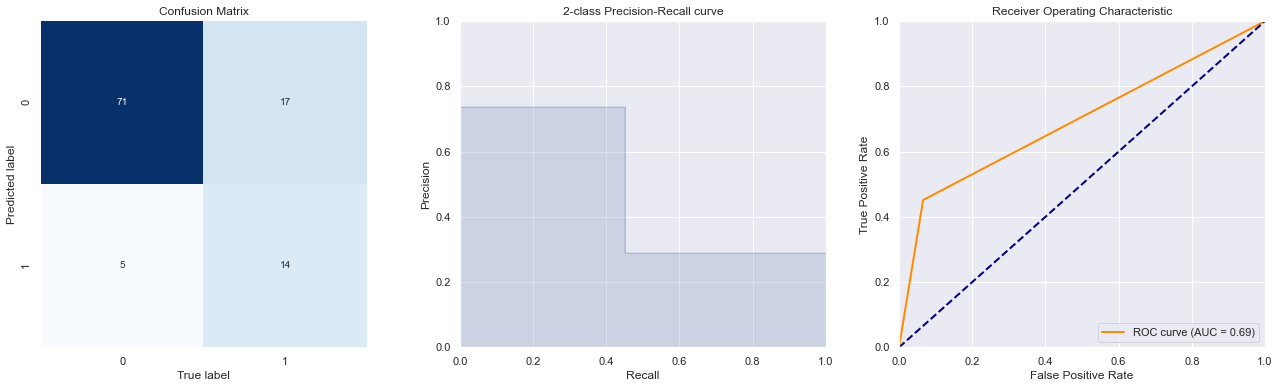

In [43]:
show_summary_report(y_test, y_pred)

In [45]:
y_test_pred_prob = dtc_clf.predict_proba(X_test)[:, 1]

Accuracy : 0.7103 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7551                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


F:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


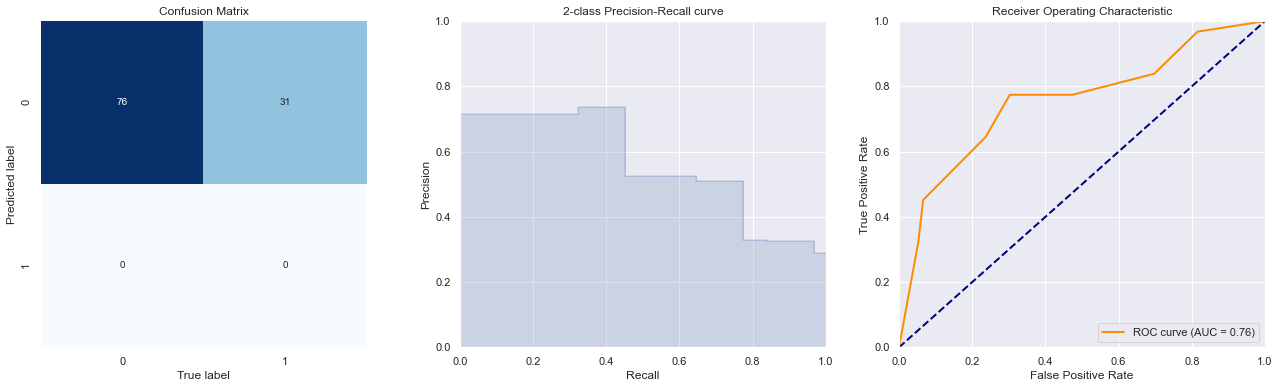

In [46]:
show_summary_report(y_test, y_test_pred_prob)

In [53]:
height = pd.DataFrame(dtc_clf.best_estimator_.fit(X, y).feature_importances_)

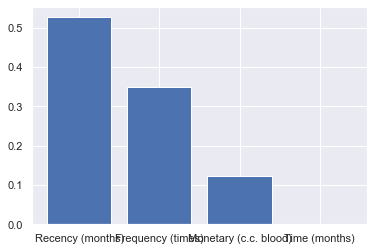

In [54]:
plt.bar(X.columns, height[0].sort_values(ascending=False));

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [55]:
from sklearn import tree
from sklearn.tree import plot_tree

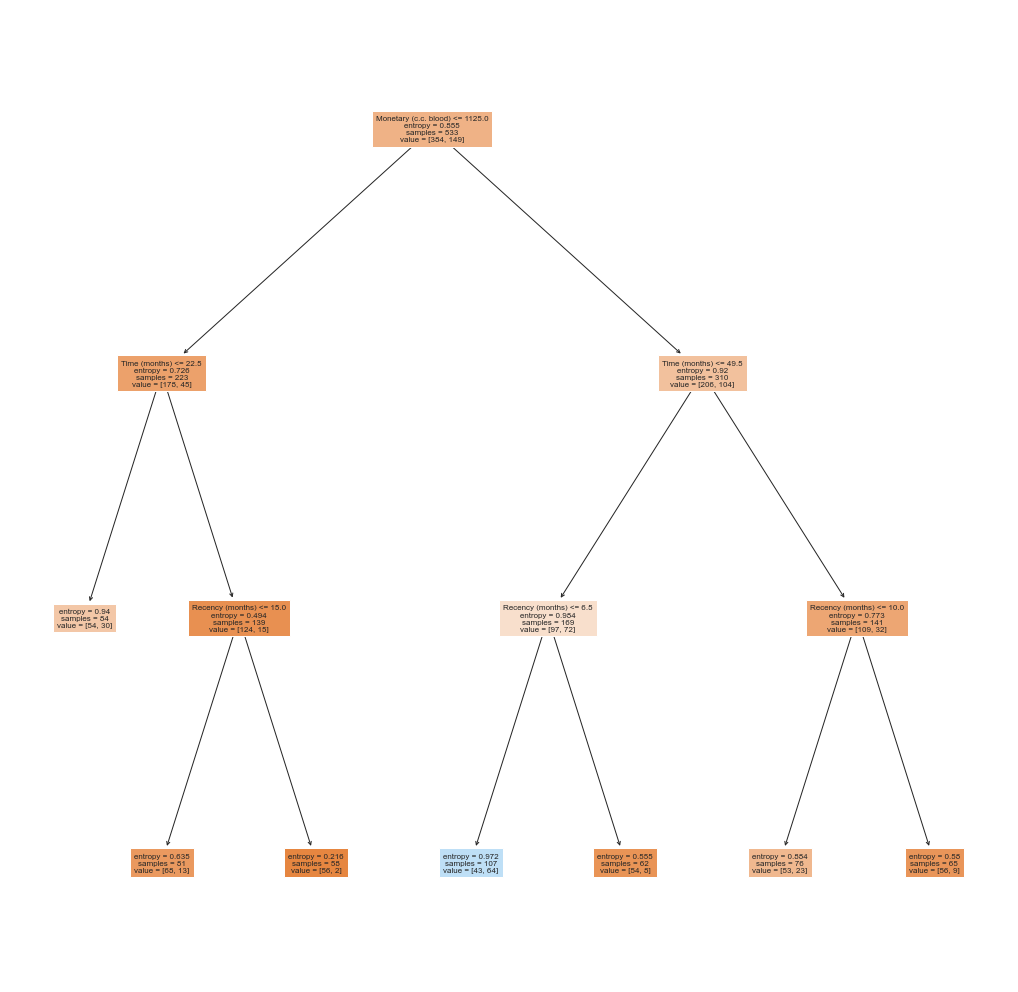

In [59]:
plt.figure(figsize=(18,18))
# plt.figure()
plot_tree(dtc_clf.best_estimator_.fit(X, y), feature_names = transfusion.columns[0:4], filled=True, fontsize= 8)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



